In [38]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


In [35]:
train = pd.read_csv('data/train.csv').drop(columns='id')
test = pd.read_csv('data/test.csv').drop(columns='id')

In [ ]:
encoder = LabelEncoder()

In [37]:
# Split the training data into features (X) and target labels (y)
X = train.drop(columns='prognosis')
y = train['prognosis']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix objects for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)


ValueError: could not convert string to float: 'West_Nile_fever'

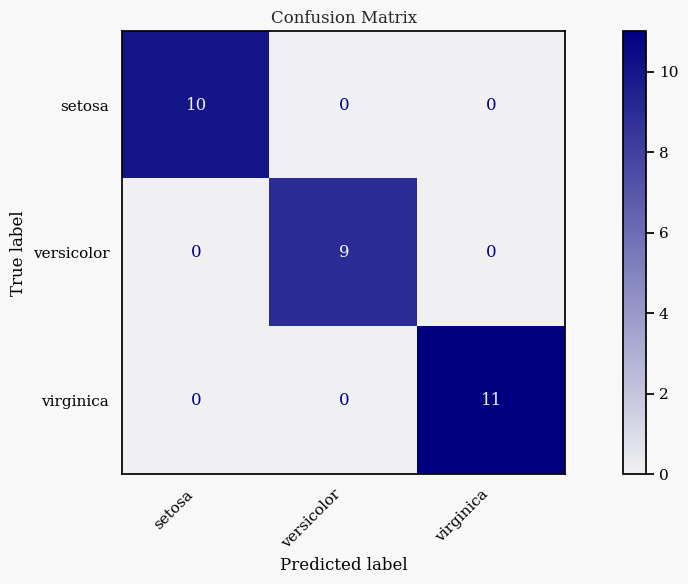

In [22]:
def show_confusion_roc(y_true: np.array, y_pred: np.array) -> None:
    """Draws a confusion matrix.
        
        Args:
            y_true: true labels.
            y_pred: predicted labels.
        
        Returns:
            None
    """
    
    mapper = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
    f, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
    cm = confusion_matrix(y_true, y_pred)
    cm_display = ConfusionMatrixDisplay(cm, display_labels=mapper.values()).plot(cmap=sns.light_palette('navy', as_cmap=True), ax=ax, values_format='d')
    ax.grid(False)
    ax.set_yticklabels(mapper.values())
    ax.set_xticklabels(mapper.values(), rotation=45, ha='right')
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_title('Confusion Matrix')
    
    plt.tight_layout()
    plt.show()

# Show confusion matrix
show_confusion_roc(y_val, preds)